# Matrix Applications: SVD & PCA 
**FIZ353 - Numerical Analysis | 20/11/2020**

Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# The spring "problem"
Consider an ideal spring attached to a body, on a frictionless surface. What else can we ask! Here is how it will look like:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 10 # N/m Spring constant
m = 1 # kg # Mass

A = 5 # cm - Amplitude
w = np.sqrt(k/m) # Frequency

N = 50 # Number of observations

t = np.linspace(0,20,N)
x = A*np.cos(w*t)

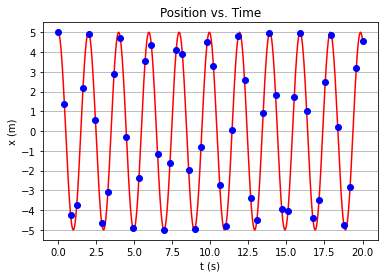

In [3]:
tt = np.linspace(0,20,1000)
xx = A*np.cos(w*tt)
plt.plot(tt,xx,"r-")

plt.plot(t,x,"ob")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.yticks(np.arange(-5,6))
plt.title("Position vs. Time")
plt.grid(axis='y')

plt.show()

So, the harmonic motion is obvious. But keep in mind that this is the position vs. time graph. If we were to record the motion of the body using a camera placed on top, we would observe something like:

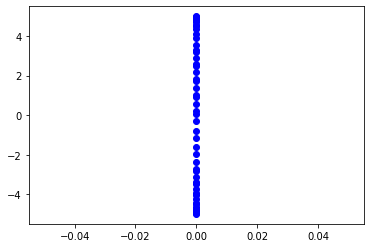

In [4]:
plt.plot(np.zeros((N,1)),x,"ob")
plt.show()

Which, obviously, is just the projection of the "x vs. t" graph unto the x axis (do please verify that this is indeed the case).

In [5]:
## A print script to feed into CalcPlot3d -- Nevermind 8)
## (https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
#for i in x:
#    print("    <point>\n        point=\"(%.4f,0,0)\"\n        color=\"rgb(0,0,255)\"\n        size=\"4\" \n        visible=\"true\"\n    </point>\n"%(i))

Go on and just play with the interactable plot below (obtained using [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)'s wonderful scripting options)

In [6]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=0,0,-1,1;focus=0,0,0,1;up=1,0,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=true;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

When the camera is recording the motion of the body, it doesn't have a reference for the axis or whatsoever. What it sees is something like this:

In [7]:
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=0,0,-1,1;focus=0,0,0,1;up=1,0,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

And it (the camera) could have been oriented in any unfortunate angle -- such as looking from the diagonal, like:

In [8]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;center=2,1,1,1;focus=0,0,0,1;up=0,1,0,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

or, even worse:

In [9]:
from IPython.display import HTML
HTML('<iframe frameborder="0" height="480px" src="https://c3d.libretexts.org/CalcPlot3D/dynamicFigure/'\
     +'index.html?type=point;point=(5.0000,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.3821,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.2359,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.7239,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.1771,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9275,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.5470,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.6251,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.1040,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.9091,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.7123,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.3039,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.8803,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.3942,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.5567,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.3605,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.1460,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9940,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.6149,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.1012,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.8823,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-1.9549,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.9631,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-0.7889,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5269,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.2916,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.7072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7882,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.0600,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8214,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.6055,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.3810,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4747,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.9072,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9762,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.8439,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.9568,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.0314,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.7280,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.9868,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(1.0289,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.4179,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-3.4713,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(2.4988,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.8528,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(0.1840,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-4.7511,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(-2.8106,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(3.1972,0,0);visible=true;color=rgb(0,0,255);size=4&type=point;point=(4.5782,0,0);visible=true;color=rgb(0,0,255);size=4&type=window;hsrmode=3;nomidpts=true;anaglyph=-1;'\
     +'center=1,0.01,0,1;focus=0,0,0,1;up=0,0,1,1;transparent=false;alpha=140;twoviews=false;unlinkviews=false;axisextension=0.7;xaxislabel=x;yaxislabel=y;zaxislabel=z;edgeson=true;faceson=false;'\
     +'showbox=false;showaxes=false;showticks=true;perspective=false;centerxpercent=0.5170894526034712;centerypercent=0.4912280701754386;rotationsteps=30;autospin=true;xygrid=false;yzgrid=false;xzgrid=false;gridsonbox=true;gridplanes=false;gridcolor=rgb(128,128,128);xmin=-5;xmax=5;ymin=-2;ymax=2;zmin=-2;zmax=2;xscale=1;yscale=1;zscale=1;zcmin=-4;zcmax=4;zoom=0.45;xscalefactor=1;yscalefactor=1;zscalefactor=1'\
     +' width="90%">')

(interact with each of the "axeless" graphs to assure that they are indeed the same points, albeit viewed from different angles)

The data recorded by the camera is dependent on what it sees, _with respect to_ its x & y axes.

## The problem (and hopefully the solution)
Now, we are going to suppose that, since we didn't know the system, we arbitrarily placed three cameras, like the ones shown in [Shlen's examplary paper](https://arxiv.org/abs/1404.1100).

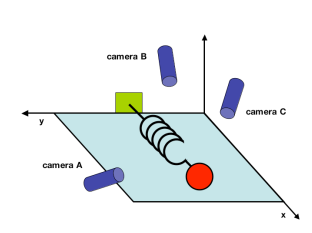

## Rotation Operator in 3D
$$\begin{align*}R &= R_z(\alpha) \, R_y(\beta) \, R_x(\gamma) \\&= \begin{bmatrix}
\cos \alpha & -\sin \alpha & 0 \\
\sin \alpha &  \cos \alpha & 0 \\
 0          &   0          & 1 \\
\end{bmatrix}\begin{bmatrix}
 \cos \beta & 0 & \sin \beta \\
  0         & 1 &  0 \\
-\sin \beta & 0 & \cos \beta \\
\end{bmatrix}\begin{bmatrix}
1 &  0          &   0 \\
0 & \cos \gamma & -\sin \gamma \\
0 & \sin \gamma &  \cos \gamma \\
\end{bmatrix}\\
&= 
\begin{bmatrix}
\cos\alpha\cos\beta & \cos\alpha\sin\beta\sin\gamma - \sin\alpha\cos\gamma & \cos\alpha\sin\beta\cos\gamma + \sin\alpha\sin\gamma \\
\sin\alpha\cos\beta & \sin\alpha\sin\beta\sin\gamma + \cos\alpha\cos\gamma & \sin\alpha\sin\beta\cos\gamma - \cos\alpha\sin\gamma \\
-\sin\beta & \cos\beta\sin\gamma & \cos\beta\cos\gamma \\
\end{bmatrix}\end{align*}$$

In [10]:
def Rx(gamma):
    Rx = np.array([[1,0,0],\
                   [0,np.cos(gamma),-np.sin(gamma)],\
                   [0,np.sin(gamma),np.cos(gamma)]])
    return Rx
def Ry(beta):
    Ry = np.array([[np.cos(beta),0,np.sin(beta)],\
                   [0,1,0],\
                   [-np.sin(beta),0,np.cos(beta)]])
    return Ry
def Rz(alpha):
    Rz =  np.array([[np.cos(alpha),-np.sin(alpha),0],\
                    [np.sin(alpha),np.cos(alpha),0],\
                    [0,0,1]])
    return Rz
def RzRyRx(alpha,beta,gamma):
    return np.linalg.multi_dot((Rz(alpha),Ry(beta),Rx(gamma)))

In [11]:
Rx(np.pi)

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00]])

In [12]:
RzRyRx(0,0,np.pi)

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00, -1.2246468e-16],
       [ 0.0000000e+00,  1.2246468e-16, -1.0000000e+00]])

## Transforming the data
If we are to transform (rotate) our data points in 3D, we need our points to be defined in 3D:

In [13]:
data3D = np.zeros((N,3))

In [14]:
for i in np.arange(N):
    data3D[i,0] = x[i]
#print(data3D)

This is our most convenient view of the data, as seen along the z-axis, with the x-axis being the horizontal and y-axis being the vertical.

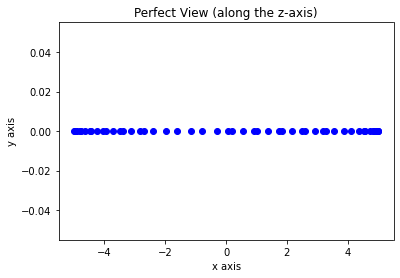

In [15]:
plt.plot(data3D[:,0],data3D[:,1],"ob")
plt.title("Perfect View (along the z-axis)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

Now, we are going to rotate our camera around the y-axis for 90&deg; degrees such that we are looking along the x-axis (and kudos to those of you who thought "but this transformation operation is about the rotation of the points, not the axes" -- fortunately, for this case, the two interpretations don't differ very much in perception ;)

In [16]:
data3Dp = np.linalg.multi_dot((Ry(np.deg2rad(90)),data3D[:,:].T)).T

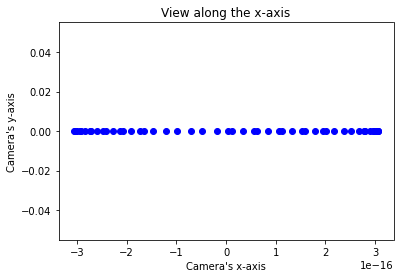

In [17]:
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.show()

It seems just about the same as looking along the z-axis until you see the order of range at the bottom (x10<sup>-16</sup>)... So, this is what it actully looks like when you equate the range to that of the z-axis view:

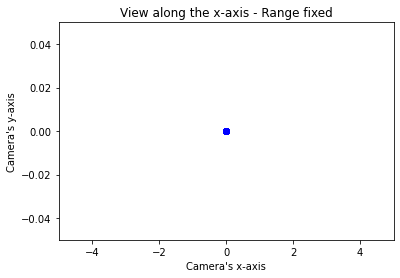

In [18]:
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis - Range fixed")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.axis(([-5,5,-0.05,0.05]))
plt.show()

...and here are the three in one graph:

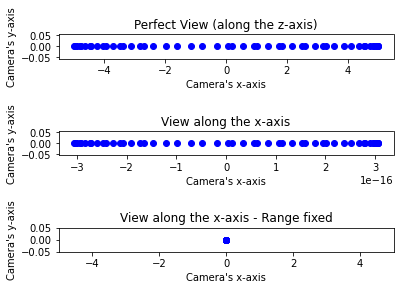

In [19]:
plt.subplot(3,1,1)
plt.plot(data3D[:,0],data3D[:,1],"ob")
plt.title("Perfect View (along the z-axis)")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")

plt.subplot(3,1,2)
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")

plt.subplot(3,1,3)
plt.plot(data3Dp[:,0],data3Dp[:,1],"ob")
plt.title("View along the x-axis - Range fixed")
plt.xlabel("Camera's x-axis")
plt.ylabel("Camera's y-axis")
plt.axis(([-5,5,-0.05,0.05]))

plt.subplots_adjust(hspace=3)
plt.show()

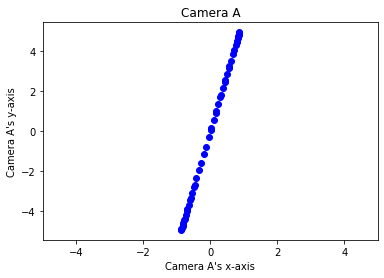

In [20]:
# Camera A data:
data3D_A = np.linalg.multi_dot((Rz(np.deg2rad(80)),Rx(np.deg2rad(20)),data3D[:,:].T)).T
plt.plot(data3D_A[:,0],data3D_A[:,1],"ob")
plt.title("Camera A")
plt.xlabel("Camera A's x-axis")
plt.ylabel("Camera A's y-axis")
plt.axis(([-5,5,np.min(data3D_A[:,1])*1.1,np.max(data3D_A[:,1])*1.1]))
plt.show()

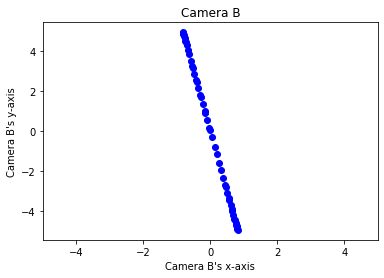

In [21]:
# Camera B data:
data3D_B = np.linalg.multi_dot((Ry(np.deg2rad(20)),Rz(np.deg2rad(100)),data3D[:,:].T)).T
plt.plot(data3D_B[:,0],data3D_B[:,1],"ob")
plt.title("Camera B")
plt.xlabel("Camera B's x-axis")
plt.ylabel("Camera B's y-axis")
plt.axis(([-5,5,np.min(data3D_B[:,1])*1.1,np.max(data3D_B[:,1])*1.1]))
plt.show()

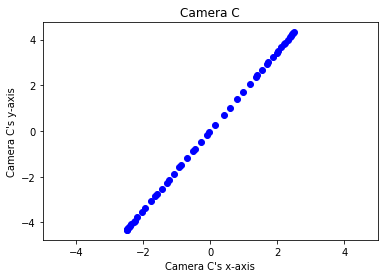

In [22]:
# Camera C data:
data3D_C = np.linalg.multi_dot((Rz(np.deg2rad(60)),Rx(np.deg2rad(160)),Rz(np.deg2rad(180)),data3D[:,:].T)).T
plt.plot(data3D_C[:,0],data3D_C[:,1],"ob")
plt.title("Camera C")
plt.xlabel("Camera C's x-axis")
plt.ylabel("Camera C's y-axis")
plt.axis(([-5,5,np.min(data3D_C[:,1])*1.1,np.max(data3D_C[:,1])*1.1]))
plt.show()

In [23]:
data_all = np.array([data3D_A[:,0],data3D_A[:,1],
                     data3D_B[:,0],data3D_B[:,1],
                     data3D_C[:,0],data3D_C[:,1]])
#data_all = np.array([data3D_C[:,0],data3D_C[:,1],
#                     data3D_B[:,0],data3D_B[:,1],
#                     data3D_A[:,0],data3D_A[:,1]])
print(data_all[:,0:3])
print(data3D_A[0,:])
print(data3D_B[1,:])
print(data3D_C[2,:])

[[ 0.86824089  0.24000231 -0.73555626]
 [ 4.92403877  1.36112074 -4.17154686]
 [-0.81587956 -0.2255284   0.69119679]
 [ 4.92403877  1.36112074 -4.17154686]
 [-2.5        -0.69105911  2.11794985]
 [-4.33012702 -1.19694949  3.66839674]]
[0.86824089 4.92403877 0.        ]
[-0.2255284   1.36112074  0.08208562]
[ 2.11794985e+00  3.66839674e+00 -1.77422299e-16]


In [48]:
S = np.dot(data_all,data_all.T)/(N-1)
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print(S)
#Sigma = np.cov(data_all)
#print(Sigma)

[[  0.39188   2.22244  -0.36824   2.22244  -1.12836  -1.95439]
 [  2.22244  12.60411  -2.08841  12.60411  -6.39927 -11.08387]
 [ -0.36824  -2.08841   0.34604  -2.08841   1.06032   1.83652]
 [  2.22244  12.60411  -2.08841  12.60411  -6.39927 -11.08387]
 [ -1.12836  -6.39927   1.06032  -6.39927   3.24900   5.62743]
 [ -1.95439 -11.08387   1.83652 -11.08387   5.62743   9.74699]]


In [50]:
[u,s,vh]=np.linalg.svd(S)
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print(u,"\n\n",s,"\n\n",vh)

[[ -0.10031   0.91853   0.36094  -0.12327   0.02775  -0.00000]
 [ -0.56891  -0.18869   0.21810  -0.27422   0.13406   0.70711]
 [  0.09427  -0.03696  -0.01482  -0.57779  -0.80975  -0.00000]
 [ -0.56891  -0.18869   0.21810  -0.27422   0.13406  -0.70711]
 [  0.28884  -0.27895   0.87761   0.22650  -0.13132  -0.00000]
 [  0.50029  -0.07694   0.06451  -0.67028   0.53884  -0.00000]] 

 [ 38.94212   0.00000   0.00000   0.00000   0.00000   0.00000] 

 [[ -0.10031  -0.56891   0.09427  -0.56891   0.28884   0.50029]
 [  0.02742  -0.39165  -0.02220  -0.39165  -0.09454  -0.82647]
 [  0.01154   0.12893  -0.13191   0.12893   0.94755  -0.22666]
 [  0.43222  -0.07796  -0.88335  -0.07796  -0.07811   0.12089]
 [ -0.89568   0.01577  -0.43921   0.01577  -0.06073  -0.02591]
 [ -0.00000  -0.70711  -0.00000   0.70711  -0.00000   0.00000]]


In [57]:
u1=u[:,0]
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print("u1: ",u1,"\n")
    print(np.dot(u1.T,data_all))


u1:  [ -0.10031  -0.56891   0.09427  -0.56891   0.28884   0.50029] 

[ -8.65516  -2.39249   7.33248   6.44623  -3.76870  -8.52975  -0.94695
   8.00623   5.37317  -5.03568  -8.15714   0.52603   8.44795   4.14439
  -6.15674  -7.54813   1.98377   8.64485   2.79551  -7.09936  -6.72037
   3.38402   8.59122   1.36561  -7.83625  -5.69786   4.68620   8.28861
  -0.10386  -8.34603  -4.51022   5.85257   7.74579  -1.57033  -8.61395
  -3.19187   6.84933   6.97850  -2.99129  -8.63223  -1.78102   7.64760
   6.00897  -4.32555  -8.40034  -0.31855   8.22423   4.86530  -5.53446
  -7.92501]


In [27]:
m = np.mean(data_all,1)
print(m)
data_all_norm = data_all.copy()
for i in np.arange(6):
    data_all_norm[i,:] -= m[i]
print(data_all[:,0:3])
print(data_all_norm[:,0:3])

[ 0.02126813  0.12061758 -0.01998551  0.12061758 -0.06123915 -0.10606932]
[[ 0.86824089  0.24000231 -0.73555626]
 [ 4.92403877  1.36112074 -4.17154686]
 [-0.81587956 -0.2255284   0.69119679]
 [ 4.92403877  1.36112074 -4.17154686]
 [-2.5        -0.69105911  2.11794985]
 [-4.33012702 -1.19694949  3.66839674]]
[[ 0.84697275  0.21873418 -0.7568244 ]
 [ 4.80342119  1.24050316 -4.29216444]
 [-0.79589405 -0.20554289  0.7111823 ]
 [ 4.80342119  1.24050316 -4.29216444]
 [-2.43876085 -0.62981996  2.179189  ]
 [-4.2240577  -1.09088017  3.77446606]]


In [28]:
S = np.dot(data_all_norm,data_all_norm.T)/(N-1)
with np.printoptions(formatter={'float': '{:9.5f}'.format}):
    print(S)

#Sigma = np.cov(data_all_norm)
#print(Sigma)

[[  0.39142   2.21983  -0.36781   2.21983  -1.12704  -1.95208]
 [  2.21983  12.58926  -2.08596  12.58926  -6.39174 -11.07081]
 [ -0.36781  -2.08596   0.34563  -2.08596   1.05907   1.83436]
 [  2.21983  12.58926  -2.08596  12.58926  -6.39174 -11.07081]
 [ -1.12704  -6.39174   1.05907  -6.39174   3.24517   5.62080]
 [ -1.95208 -11.07081   1.83436 -11.07081   5.62080   9.73551]]


In [29]:
[u,s,vh]=np.linalg.svd(S)
u*=-1
print(u,"\n\n",s,"\n\n",vh)

[[ 1.00314813e-01 -8.09220291e-01  2.35672001e-01  4.14912754e-01
   3.27727896e-01 -8.76457853e-17]
 [ 5.68913576e-01  2.26385663e-01 -1.19466587e-01  3.28291225e-01
   5.51314889e-02  7.07106781e-01]
 [-9.42650896e-02  2.49851482e-01 -7.13635321e-02 -1.93010414e-01
   9.41457676e-01 -4.01886037e-16]
 [ 5.68913576e-01  2.26385663e-01 -1.19466587e-01  3.28291225e-01
   5.51314889e-02 -7.07106781e-01]
 [-2.88844992e-01  4.19818051e-01  7.19849263e-01  4.71191184e-01
   1.08296215e-02  6.46413661e-17]
 [-5.00294202e-01  6.31555549e-02 -6.26608699e-01  5.94157385e-01
   7.45839830e-03 -9.89268484e-17]] 

 [3.88962530e+01 2.48895119e-15 1.53755098e-15 6.03248792e-16
 2.56889985e-16 5.12275336e-32] 

 [[-1.00314813e-01 -5.68913576e-01  9.42650896e-02 -5.68913576e-01
   2.88844992e-01  5.00294202e-01]
 [-2.36681200e-01  1.00707289e-01 -4.99866436e-02  1.00707289e-01
  -7.36060591e-01  6.15966099e-01]
 [ 3.94008891e-01 -3.69147353e-01 -3.86422500e-01 -3.69147353e-01
  -5.23883511e-01 -3.85280

In [30]:
u1=u[:,0]
print(u1)


[ 0.10031481  0.56891358 -0.09426509  0.56891358 -0.28884499 -0.5002942 ]


In [31]:
for i in [0,2,4]:
    print(u1[i+1]/u1[i])

5.671281819617699
-6.035252053883913
1.7320508075688776


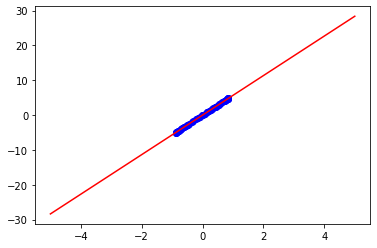

In [32]:
plt.plot(data_all_norm[0,:],data_all_norm[1,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[1]/u1[0]*xx
plt.plot(xx,yy,"r-")
plt.show()

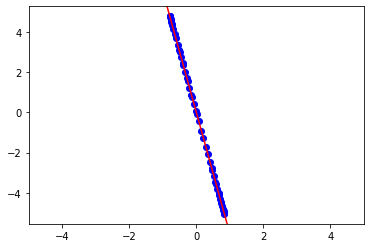

In [33]:
plt.plot(data_all_norm[2,:],data_all_norm[3,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[3]/u1[2]*xx
plt.axis([-5,5,np.min(data_all_norm[3,:])*1.1,np.max(data_all_norm[3,:])*1.1])
plt.plot(xx,yy,"r-")
plt.show()

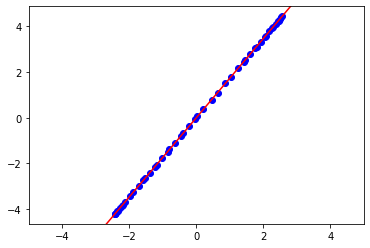

In [34]:
plt.plot(data_all_norm[4,:],data_all_norm[5,:],"bo")
xx = np.linspace(-5,5,N)
yy = u1[5]/u1[4]*xx
plt.axis([-5,5,np.min(data_all_norm[5,:])*1.1,np.max(data_all_norm[5,:])*1.1])
plt.plot(xx,yy,"r-")
plt.show()

In [35]:
print(u1)
print(data_all_norm.shape)

[ 0.10031481  0.56891358 -0.09426509  0.56891358 -0.28884499 -0.5002942 ]
(6, 50)


In [36]:
res=np.dot(u.T,data_all_norm)

In [37]:
res.shape

(6, 50)

In [38]:
with np.printoptions(formatter={'float': '{:7.3f}'.format}):
    print(res[:,0:8])

[[  8.443   2.180  -7.544  -6.658   3.557   8.318   0.735  -8.218]
 [  0.000   0.000  -0.000  -0.000   0.000   0.000   0.000  -0.000]
 [  0.000  -0.000   0.000   0.000  -0.000   0.000  -0.000   0.000]
 [  0.000  -0.000  -0.000  -0.000   0.000   0.000   0.000  -0.000]
 [ -0.000  -0.000   0.000   0.000  -0.000  -0.000  -0.000   0.000]
 [  0.000   0.000  -0.000  -0.000   0.000   0.000   0.000  -0.000]]


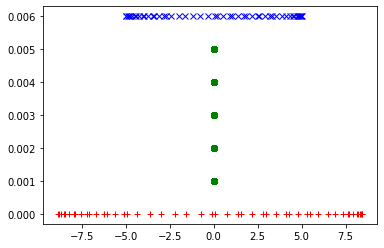

In [39]:
plt.plot(res[0,:],np.zeros(N),"r+")
for i in range(1,6):
    plt.plot(res[i,:],np.ones(N)*0.001*i,"go")
plt.plot(x,np.ones(N)*0.006,"bx")
plt.show()

In [40]:
np.var(res[0,:])

38.11832794269996

In [41]:
with np.printoptions(formatter={'float': '{:7.3f}'.format}):
    print(np.diagonal(np.cov(data_all_norm)))

[  0.391  12.589   0.346  12.589   3.245   9.736]


In [42]:
np.var(x)

12.721066369316297

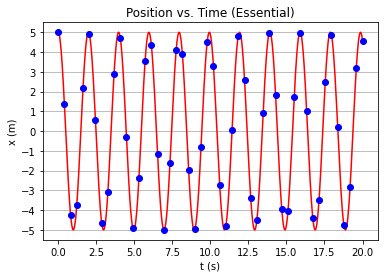

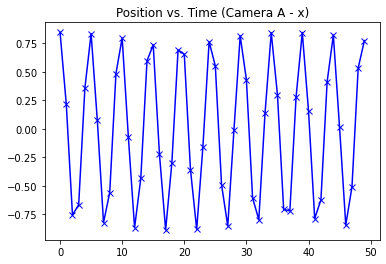

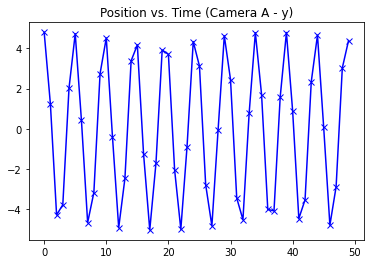

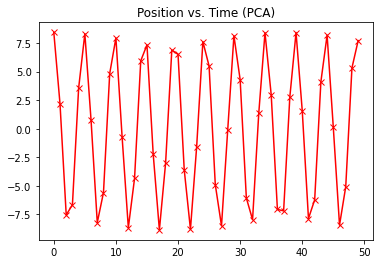

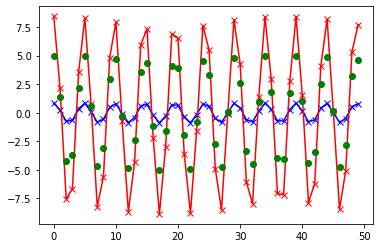

In [43]:
tt = np.linspace(0,20,1000)
xx = A*np.cos(w*tt)
plt.plot(tt,xx,"r-")

plt.plot(t,x,"ob")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.yticks(np.arange(-5,6))
plt.title("Position vs. Time (Essential)")
plt.grid(axis='y')
plt.show()

plt.title("Position vs. Time (Camera A - x)")
plt.plot(data_all_norm[0,:],"bx-")
plt.show()

plt.title("Position vs. Time (Camera A - y)")
plt.plot(data_all_norm[1,:],"bx-")
plt.show()

plt.title("Position vs. Time (PCA)")
plt.plot(res[0,:],"rx-")
plt.show()


plt.plot(data_all_norm[0,:],"bx-",res[0,:],"rx-",x,"go")
plt.show()

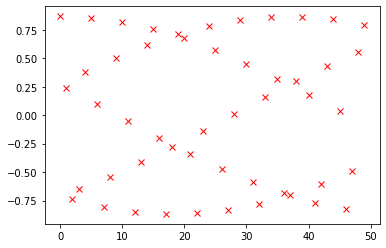

In [44]:
plt.plot(data3D_A[:,0],"rx")
plt.show()

# References
* Jonathon Shlens, "A Tutorial on Principal Component Analysis" (2014) [arXiv:1404.1100](https://arxiv.org/abs/1404.1100)